In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
%matplotlib inline

## 4.1

In [3]:
sp_sin = [np.sin(i) for i in range(1, 101)]
sp_cos = [np.cos(i) for i in range(1, 101)]

In [4]:
print(np.mean(sp_sin))
print(np.std(sp_sin))
print(stats.moment(sp_sin, moment = 4))
print(stats.kurtosis(sp_sin))

-0.0012717101366042016
0.7090008871157724
0.37697988066557236
-1.5081297338390796


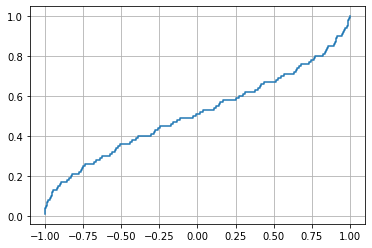

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_sin = ECDF(sp_sin)
plt.step(ecdf_sin.x, ecdf_sin.y)
plt.grid();

[[ 1.         -0.00273378]
 [-0.00273378  1.        ]]


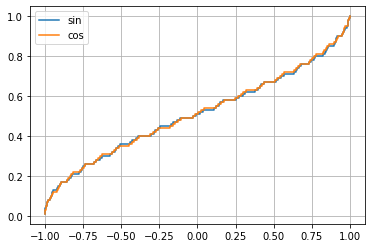

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_sin = ECDF(sp_sin)
ecdf_cos = ECDF(sp_cos)
plt.step(ecdf_sin.x, ecdf_sin.y, label = 'sin')
plt.step(ecdf_cos.x, ecdf_cos.y, label = 'cos')
plt.legend()
plt.grid();
print(np.corrcoef(sp_sin, sp_cos))

## 4.2

In [5]:
def IsPrime(n):
    d = 2
    while d * d <= n and n % d != 0:
        d += 1
    return d * d > n

In [19]:
sp = [i for i in range(3, 99992) if IsPrime(i)]
sp1 = []
for i in range(3, 99992):
    if IsPrime(i):
        sp1.append(i * (-1))
spp = sp + sp1
print(stats.skew(sp))
print(stats.kurtosis(spp))

0.08788574351776704
-1.0926019048834879


## 4.3

In [3]:
def MeanGeom(s, n):
    proizv = 1
    for i in range(n):
        proizv *= s[i]
    return (proizv ** (1 / n)) 

def MeanGarm(s, n):
    s1 = []
    for i in range(n):
        s1.append(1 / s[i])
    summa = sum(s1)
    return (n / summa)

def MeanStep(s, n, a):
    if a != 0:
        s1 = []
        for i in range(n):
            s1.append(s[i] ** a)
        summa = sum(s1)
    return (summa / n) ** (1 / a)
    

In [10]:
spdv = [i for i in range(10, 100) if IsPrime(i)]
print(MeanGeom(spdv, len(spdv)))
print(MeanGarm(spdv, len(spdv)))
print(MeanStep(spdv, len(spdv), 2))

41.781014648871
33.51277429915806
55.937465083787984


## 4.4

In [11]:
spdv = [i for i in range(10, 100) if IsPrime(i)]
s1 = [random.choice(spdv) for i in range(5)]
g = MeanGeom(spdv, len(spdv))
g5 = MeanGeom(s1, len(s1))
s2 = []
for i in range(100000):
    s2.append(MeanGeom([random.choice(spdv) for i in range(5)], 5))
print(np.mean(s2))

43.461407029925994


## 4.5

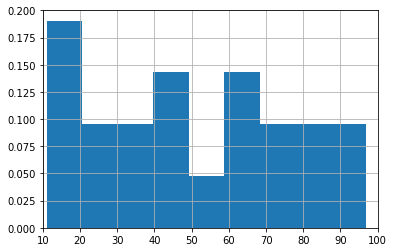

In [9]:
spdv = np.array([i for i in range(10, 100) if IsPrime(i)])
plt.hist(spdv, bins = 9, weights = np.zeros_like(spdv) + 1 / spdv.size)
plt.grid()
plt.xlim(10, 100);

## 4.6

In [28]:
def MeanV(s):
    return(1 / len(s)) * sum(s)

def VarIspV(s):
    const = MeanV(s)
    s1 = []
    for i in range(len(s)):
        s1.append((s[i] - const) ** 2)
    return(sum(s1) * (len(s) / (len(s) - 1) * len(s)))    

def MomentT(s):
    const = MeanV(s)
    s1 = []
    for i in range(len(s)):
        s1.append((s[i] - const) ** 3)
    return(sum(s1) * (1 / len(s)))
    
def MomentIsp(s):
    const = MeanV(s)
    s1 = []
    for i in range(len(s)):
        s1.append((s[i] - const) ** 3)
    return(sum(s1) * len(s) / ((len(s) - 1) * (len(s) - 2)))

In [29]:
from scipy.stats import norm
x = norm(2, 5)
sample = x.rvs(size = 100)
s1 = []
s2 = []
for i in range(10000):
    sample = x.rvs(size = 100)
    s1.append(MeanV(sample))
    s2.append(np.mean(sample))
print(np.mean(s1))
print(np.mean(s2))

1.9944527844616957
1.9944527844616957


## 4.7

In [70]:
from scipy.stats import norm
x = norm(2, 5)
s1 = []
s2 = []
for i in range(10000):
    sample = x.rvs(size = 1000)
    s1.append(MeanV(sample))
    s2.append(VarIspV(sample))
np.cov(s1, s2)[0][1]

-2527.766855081265

In [71]:
from scipy.stats import norm
x = norm(2, 5)
s1 = []
s2 = []
for i in range(1000):
    sample = x.rvs(size = 1000)
    s1.append(MeanV(sample))
    s2.append(MomentIsp(sample))
np.cov(s1, s2)[0][1]

-0.030452305270016296

## 4.9

In [62]:
from scipy.stats import norm
x = norm(2, 5)
s1 = []
s2 = []
for i in range(10000):
    sample = x.rvs(size = 1000)
    s1.append(VarIspV(sample))
    s2.append(VarIspV(sample))
np.cov(s1, s2)[0][1]

1230146925452.894

In [69]:
from scipy.stats import norm
x = norm(2, 5)
s1 = []
s2 = []
for i in range(10000):
    sample = x.rvs(size = 1000)
    s1.append(MomentIsp(sample))
    s2.append(MomentIsp(sample))
np.cov(s1, s2)[0][1]

91.24570715955761